In [14]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# Week 8: Unsupervised Learning  
In this week’s task, we applied **unsupervised learning** techniques on our student dataset to explore patterns and clusters without using the target variable.  

**Dataset:** cleaned_students.csv  
**Goal:** Discover hidden student groups and visualize them in 2D using PCA.

---








In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


Matplotlib is building the font cache; this may take a moment.


In [2]:
# Step 2: Load Dataset
df = pd.read_csv("cleaned_students.csv")
print("✅ Dataset Loaded Successfully!")
df.head()


✅ Dataset Loaded Successfully!


,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Mathematics,97.36,40.61,59.61,...,62.84,59.8865,F,10.3,Yes,No,Master's,Medium,1,5.9
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,98.23,81.9170,B,27.1,No,No,High School,Low,4,4.3
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,91.22,67.7170,D,12.4,Yes,No,High School,Low,9,6.1
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,...,55.48,51.6535,F,25.5,No,Yes,High School,Low,8,4.9
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,...,87.43,71.4030,C,13.3,Yes,No,Master's,Medium,6,4.5


In [3]:
# Step 3: Drop target variable for unsupervised learning
X = df.drop(columns=["Grade"])  # We don’t use labels for clustering

# Optional: check first few rows
X.head()


,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Mathematics,97.36,40.61,59.61,...,5.2,62.84,59.8865,10.3,Yes,No,Master's,Medium,1,5.9
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,5.2,98.23,81.9170,27.1,No,No,High School,Low,4,4.3
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,4.7,91.22,67.7170,12.4,Yes,No,High School,Low,9,6.1
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,...,4.2,55.48,51.6535,25.5,No,Yes,High School,Low,8,4.9
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,...,5.2,87.43,71.4030,13.3,Yes,No,Master's,Medium,6,4.5


In [4]:
# Step 4: Standardize numeric features for clustering
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numeric_features])

print("✅ Features standardized")


✅ Features standardized


In [5]:
# Step 5: Apply K-Means
k = 3  # assuming we want 3 clusters, can be adjusted
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df['Cluster'] = clusters
print("✅ K-Means clustering applied")
df['Cluster'].value_counts()


✅ K-Means clustering applied


Cluster
2    1825
0    1765
1    1410
Name: count, dtype: int64

In [6]:
# Step 6: Reduce dimensions to 2D using PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.16455249 0.08911356]


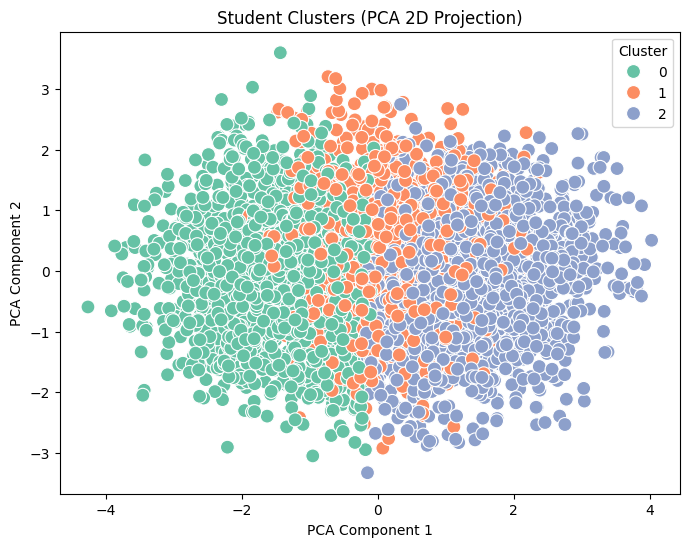

In [7]:
# Step 7: Visualize clusters in 2D
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster'], palette='Set2', s=100)
plt.title("Student Clusters (PCA 2D Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.show()


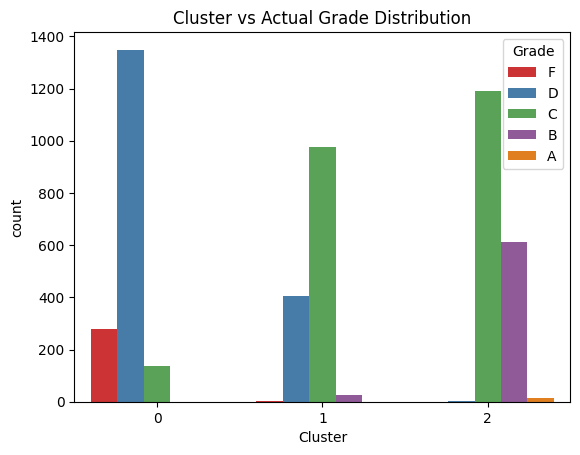

In [8]:
# Step 8: Optional - Compare clusters with actual grades
sns.countplot(x='Cluster', hue='Grade', data=df, palette='Set1')
plt.title("Cluster vs Actual Grade Distribution")
plt.show()


# Week 8: Unsupervised Learning Report

**Dataset:** cleaned_students.csv  
**Technique Used:** K-Means Clustering & PCA  

### Key Steps:
1. Standardized numeric features.  
2. Applied K-Means to create **3 clusters** of students.  
3. Reduced dimensions to 2D using **PCA**.  
4. Visualized clusters in 2D and compared with actual grades.

### Insights:
- Clustering revealed hidden groups of students based on their performance features.  
- PCA allowed us to visualize the separability of clusters.  
- Some clusters correspond closely to actual grade categories, suggesting patterns in student performance.  

**Project Milestone:**  
Unsupervised analysis added to the project — provides additional insights into student groupings without using labels.
